In [1]:
#Import directories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mal = pd.read_csv("AnimeList.csv")
print("The total number of items in this dataset are {}".format(len(mal)))
mal.head()

The total number of items in this dataset are 14478


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [1]:
#Checking the columns
mal.info()

NameError: name 'mal' is not defined

In [3]:
#Copy the finished animes into a new dataframe. We want to only analyse anime that have finished
#This will give a better analysis, as ratings are unlikely to change over the course of the run.
mal_finished = mal[mal["status"]=="Finished Airing"].copy()
print("Of these, {} have finished airing".format(len(mal_finished)))

Of these, 13791 have finished airing


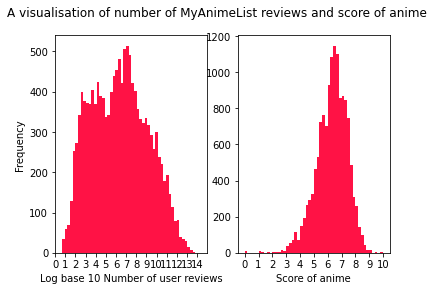

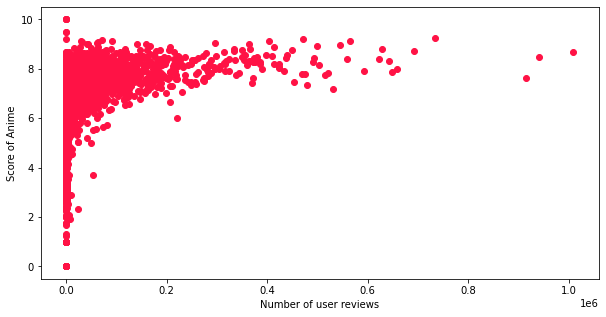

In [4]:
#There is no review, if there are no users who reviewed it.
#log of 0 is undefined, so we must not log these values.
c="#ff1245"
users_reviews_by =np.log(mal_finished[mal_finished["scored_by"] > 1 ].scored_by)
fig, ax = plt.subplots(1,2)
plt.suptitle("A visualisation of number of MyAnimeList reviews and score of anime")
plt.rcParams["figure.figsize"] = (10,5)
ax[0].hist(users_reviews_by,bins=50, color=c)
ax[0].set_xlim(0,15)
ax[0].set_xticks(np.arange(np.floor(min(users_reviews_by)),np.ceil(max(users_reviews_by))+1,1))
ax[0].set_xlabel("Log base 10 Number of user reviews")
ax[0].set_ylabel("Frequency")

#Distribution of the scores and how many people have scored it.
ax[1].hist(mal_finished["score"],bins=50, color=c)
ax[1].set_xticks(range(0,11))
ax[1].set_xlabel("Score of anime")
plt.show()

plt.scatter(x="scored_by",y="score", data=mal_finished, c=c)
plt.xlabel("Number of user reviews")
plt.ylabel("Score of Anime")
plt.show()


<p>The data seems to be somewhat normally distributed. For the number of reviews and score of anime. Although there seems toi be a slighly skewness.</p>

In [5]:
def convert_times(arr):
    """
    Converts times into a DateTime object.
    """
    from datetime import timedelta as td
    
    converted_times = []
    for i in arr:
        hour = 0
        minute = 0
        second = 0
        if "hr." in i:
            hour_min = i.split("hr.")
            hour = int(hour_min[0])
            if len(hour_min) ==2 and "min." in hour_min[1]:
                minute = int(hour_min[1].split("min.")[0])
        elif "min." in i:
            minute = int(i.split("min.")[0])
        elif "sec." in i:
            second = int(i.split("sec.")[0])
        converted_times.append(td(hours=hour,minutes=minute, seconds = second))
    return converted_times

#Get the dates into a datetime object.
mal_finished["duration_dt"] = convert_times(mal_finished.duration)

In [87]:
mal_finished.head(4)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_dt
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",00:24:00
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",00:24:00
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",00:24:00
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",00:16:00


In [84]:
mal_finished[premiered]

0        Winter 2012
1        Spring 2007
2          Fall 2008
3        Summer 2002
4          Fall 2012
            ...     
14472            NaN
14473      Fall 1987
14474            NaN
14476            NaN
14477            NaN
Name: premiered, Length: 13791, dtype: object

In [6]:
#Testing if beautiful soup works. 
from bs4 import BeautifulSoup
from requests import get
import re
import time

url = "https://www.anime-planet.com/anime/all?page=1"
response = get(url)
print(response.text[0:500])

<!doctype html>
<html xml:lang="en" lang="en" class="mulifont ">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# profile: http://ogp.me/ns/profile# book: http://ogp.me/ns/book# video: http://ogp.me/ns/video#">
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>Browse All Anime | Anime-Planet</title>
<meta name="description" content="Create of a list of anime you've seen, watch them online, discover new anime and more on Anime-Planet. Search thousands of ani


In [92]:
#Get the response into a beautiful soup 
html_soup = BeautifulSoup(response.text,"html.parser")
type(html_soup)

bs4.BeautifulSoup

In [98]:
len(html_soup.find_all("li", {"data-type": "anime"}))
#There are 35 pages, so we must do this multiple times- it is best to write a function.

35

In [287]:
#Defining a function to scrape a html search page on anime planet.
def scrape_anime_planet_page(html_soup, anime_list):    
    """
    A web scraping function. It will take in a html soup i.e. a html page parsed with Beautiful soup.
    And the second variable is an array, which will be filled and returned.
    """
    #Get all the animes on the page
    anime_page_list = html_soup.find_all("li", {"data-type": "anime"})

    for anime_html_tag in anime_page_list: 
        #Get each url
        anime_url = anime_html_tag.a["href"]

        anime_response = get("https://www.anime-planet.com"+anime_url)
        #Parse it using beautiful soup.
        anime_soup = BeautifulSoup(anime_response.text,"html.parser")
        #main info.
        info = anime_soup.find_all("section",{"class":"pure-g"})[0].find_all("div")

        #Properties we want.
        title = anime_soup.find("h1",{"itemprop":"name"}).text
        anime_type = ""
        studio = ""
        year = ""
        season= np.nan
        rating = 0
        no_of_votes = 0
        rank = np.nan
        episode_length = ""

        #Detail 0 contains info about type and anime length.
        detail_0 = info[0].text.strip().split("\n")

        anime_type = detail_0[0] #Type
        if len(detail_0)>1:
            episode_length = (re.sub(r'\(?\)?', '',
            detail_0[1] )) #No of episodes

        studio = info[1].text.strip().replace("\n","") #Studio

        #Detail 2 contains info about Year and if season is there, season 
        detail_2 = info[2].text.strip().split("\n") 

        for i in detail_2:
            #First get the year
            if(year == "" and i.strip() != ""):
                year = i
            #next get the season    
            if(year != "" and year != i and season == "" and i.strip() != ""):
                season = i

        #detail 3 contains rating and no of votes.
        detail_3 =info[3].text 
        #we want to get the info if, there are enough votes. Otherwise it will say "x more votes needed"
        if("more" not in detail_3 and "needed" not in detail_3):
            #always the first word is the rating
            rating = float(detail_3.strip().split()[0])
            #The penultimate word is always the no of votes.
            no_of_votes = int(detail_3.strip().split()[-2].replace(",",""))
        else break #This means that we have reached the end of the anime which have ratings.

        detail_4 = info[-1].text.strip()
        #get it if it is not empty.
        if(detail_4 != ""):
            rank = int(detail_4.split()[-1].replace("#","").replace(",",""))

        anime_info = {"title":title,"anime_type":anime_type,"studio":studio,"year":year,"season":season,
                     "rating":rating,"no_of_votes":no_of_votes,"rank":rank, "episode_length":episode_length}
        anime_list.append(anime_info)
    return anime_list

In [ ]:
#List of anime we want to populate.
anime_list = []

#There are 440 pages, we can try this for 5 to see if works. We have the base url.
url = "https://www.anime-planet.com/anime/all?page="

#get it for all the pages.
for p in range(1,441):
    response = get(url+str(p))
    #Get the soup of html.
    html_soup = BeautifulSoup(response.text,"html.parser")
    
    #Every 5th page, sleep for 5-15 seconds in order to prevent captchas.
    if(p%10 == 0):
        time.sleep(np.random.randint(5,15))
    #Scrape the page and get the animes
    scrape_anime_planet_page(html_soup, anime_list)

In [180]:
#Write a script to scrape from a details page.
def scrape_anime_planet_details(anime_url, mal_id ,anime_list): 
    """
    Scrapes a anime-planet page and returns it in the list we passed in. 
    It requires MyanimelistId, it will also link that with the anime-planet page and return it.
    """
    anime_response = get(anime_url)
    #Parse it using beautiful soup.
    anime_soup = BeautifulSoup(anime_response.text,"html.parser")
    #main info.
    info = anime_soup.find_all("section",{"class":"pure-g"})[0].find_all("div")

    #Properties we want.
    title = anime_soup.find("h1",{"itemprop":"name"}).text
    anime_type = ""
    studio = ""
    year = ""
    season= np.nan
    rating = 0
    no_of_votes = 0
    rank = np.nan
    episode_length = ""

    #Detail 0 contains info about type and anime length.
    detail_0 = info[0].text.strip().split("\n")

    anime_type = detail_0[0] #Type
    if len(detail_0)>1:
        episode_length = (re.sub(r'\(?\)?', '',
        detail_0[1] )) #No of episodes

    studio = info[1].text.strip().replace("\n","") #Studio

    #Detail 2 contains info about Year and if season is there, season 
    detail_2 = info[2].text.strip().split("\n") 

    for i in detail_2:
        #First get the year
        if(year == "" and i.strip() != ""):
            year = i
        #next get the season    
        if(year != "" and year != i and season == "" and i.strip() != ""):
            season = i

    #detail 3 contains rating and no of votes.
    detail_3 =info[3].text 
    #we want to get the info if, there are enough votes. Otherwise it will say "x more votes needed"
    if("more" not in detail_3 and "needed" not in detail_3):
        #always the first word is the rating
        rating = float(detail_3.strip().split()[0])
        #The penultimate word is always the no of votes.
        no_of_votes = int(detail_3.strip().split()[-2].replace(",",""))

    detail_4 = info[-1].text.strip()
    #get it if it is not empty.
    if(detail_4 != ""):
        rank = int(detail_4.split()[-1].replace("#","").replace(",",""))

    anime_info = {"title":title,"anime_type":anime_type,"studio":studio,"year":year,"season":season,
                     "rating":rating,"no_of_votes":no_of_votes,"rank":rank, "episode_length":episode_length, "anime_id":mal_id}
    anime_list.append(anime_info)

In [ ]:
anime_planet = pd.DataFrame(anime_list)
anime_planet.to_csv("AnimePlanet.csv")

In [354]:
mal.studio.unique()

array(['David Production', 'Gonzo', 'Satelight', 'Hal Film Maker',
       'J.C.Staff', 'Studio Pierrot, Studio Hibari', 'Production Reed',
       'Bones', 'Studio Deen', 'Brain&#039;s Base', 'Studio Pierrot',
       'Madhouse', 'Production I.G', 'Group TAC', 'TMS Entertainment',
       'Pierrot Plus', 'Tatsunoko Production',
       'Hal Film Maker, TYO Animations', 'Shin-Ei Animation',
       'Toei Animation', 'Tokyo Movie Shinsha', 'Sunrise', 'Zexcs',
       'Yumeta Company', 'Milky Cartoon, LMD', 'White Fox', nan, 'Lerche',
       'Production I.G, Zexcs', 'Studio 4°C', 'Kachidoki Studio', 'DLE',
       'Studio VOLN', 'Xebec', 'J.C.Staff, Toei Animation', 'Bridge',
       'A-1 Pictures', 'Fanworks', 'Nippon Animation', 'Animate Film',
       'G-Lam', 'Kyoto Animation', 'Trinet Entertainment', 'OLM', 'Shaft',
       'SynergySP', 'ufotable', 'Creators in Pack', 'SANZIGEN',
       'Office Takeout', 'Sanrio', 'Zero-G Room', 'TROYCA',
       'Triangle Staff', 'Bandai Namco Pictures', 'ACC 

In [18]:
anime_planet= pd.read_csv("AnimePlanet.csv")


In [19]:
anime_planet


,Unnamed: 0,title,anime_type,studio,year,season,rating,no_of_votes,rank,episode_length
0,0,Fullmetal Alchemist: Brotherhood,TV,Bones,2009 - 2010,NaN,4.701,91569,1,64 eps
1,1,Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...,Movie,ufotable,2020,NaN,4.670,153,2,1 ep
2,2,Haikyuu!! To the Top: Part II,TV,Production I.G,2020 - ?,NaN,4.666,1678,3,6+ eps
3,3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,Production I.G,2016,NaN,4.660,21571,4,10 eps
4,4,A Silent Voice,Movie,Kyoto Animation,2016,NaN,4.655,40758,5,1 ep x 130 min
...,...,...,...,...,...,...,...,...,...,...
13252,13252,Kokuhaku,Web,NaN,2015,NaN,0.894,189,13253,1 ep x 1 min
13253,13253,Mars of Destruction,OVA,Wao World,2005,NaN,0.862,2069,13254,1 ep x 20 min
13254,13254,Utsu-Musume Sayuri,Movie,NaN,2003,NaN,0.827,392,13255,1 ep x 3 min
13255,13255,Nami,Movie,NaN,2000,NaN,0.823,301,13256,1 ep x 3 min


In [353]:
mal.source.unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Unknown', 'Other', 'Music', 'Game',
       'Picture book', 'Card game', 'Web manga', 'Book', 'Radio',
       'Digital manga'], dtype=object)

In [7]:
#This JSON file contains relations between the Kaggle MAL Dataset and other websites. 
#The other website we will be comparing to is AnimePlanet. Anime-Planet is the second largest ratings website after MAL.
import json
animejson = 0
with open("C:/Users/sathi/Documents/Data Science/Anime/anime-offline-database.json", "rb") as f:
    animejson = json.load(f)

In [259]:
animejson #This contains the same data as on the Kaggle Dataset.

{'data': [{'sources': ['https://anidb.net/anime/10143',
    'https://anilist.co/anime/102416',
    'https://anime-planet.com/anime/chiaki-kuriyama-0',
    'https://kitsu.io/anime/8925',
    'https://myanimelist.net/anime/20707',
    'https://notify.moe/anime/Ff1bpKmmR'],
   'title': '"0"',
   'type': 'Special',
   'episodes': 1,
   'status': 'FINISHED',
   'animeSeason': {'season': 'FALL', 'year': 2013},
   'picture': 'https://cdn.myanimelist.net/images/anime/6/54815.jpg',
   'thumbnail': 'https://cdn.myanimelist.net/images/anime/6/54815t.jpg',
   'synonyms': ['Chiaki Kuriyama - 0',
    'Chiaki Kuriyama - Zero',
    'Chiaki Kuriyama: "0"',
    'Chiaki Kuriyama: 「0」',
    '「0」',
    '栗山 千明「0」'],
   'relations': [],
   'tags': ['female protagonist', 'music']},
  {'sources': ['https://anidb.net/anime/3689',
    'https://kitsu.io/anime/9179',
    'https://myanimelist.net/anime/25627',
    'https://notify.moe/anime/eM1-pKmiR'],
   'title': '"Aesop" no Ohanashi yori: Ushi to Kaeru, Yokubatta

In [235]:
#Start off with an empty list, we want to append our results into here.
anime_list = []

#we want to set a counter so we dont trigger a capcha
counter = 0

for j_anime in animejson["data"]:
    #Check if anime planet and myanimelist are both there. 
    ap_url = 0 
    mal_url = 0
    for source in j_anime["sources"]:
        if source.find("myanimelist") != -1:
            mal_url = source
        if source.find("anime-planet") != -1:  
            ap_url = source

    #if the json file has a relation linking both the websites, we scrape.         
    if(ap_url != 0  and mal_url != 0):
        #get the myanimelist number, we need this to join onto the Kaggle dataset.
        mal_id = mal_url.rsplit('/', 1)[-1]

        #Every 150 anime pages, sleep for 5-15 seconds in order to prevent captchas.
        if(counter % 150 == 0):
            time.sleep(np.random.randint(5,15))
            
        #Scrape and get anime details and populate the list.
        scrape_anime_planet_details(ap_url,mal_id,anime_list)
        counter += 1
        
anime_planet = pd.DataFrame(anime_list)
anime_planet.to_csv("AnimePlanet_scraped.csv")

In [21]:
anime_planet = pd.read_csv("AnimePlanet_scraped.csv")
anime_planet.drop(columns="Unnamed: 0",axis=1, inplace=True)
anime_planet

,title,anime_type,studio,year,season,rating,no_of_votes,rank,episode_length,anime_id
0,"Chiaki Kuriyama: ""0""",Music Video,NaN,2013,NaN,1.768,189,11853.0,1 ep x 2 min,20707
1,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",OVA,Production I.G,2009,NaN,3.410,1511,4183.0,1 ep x 17 min,7669
2,"""Bungaku Shoujo"" Memoire",OVA,Production I.G,2010,NaN,3.857,1614,2109.0,3 eps x 25 min,8481
3,"""Bungaku Shoujo"" Movie",Movie,Production I.G,2010,NaN,3.941,3071,1734.0,1 ep x 101 min,6408
4,Calpis: Hakkou Monogatari,Web,NaN,2018,NaN,1.405,12,12996.0,1 ep x 2 min,38045
...,...,...,...,...,...,...,...,...,...,...
10515,Zunda Horizon,Movie,"Wao World, Studio Live",2017,NaN,1.433,35,12936.0,1 ep x 23 min,33390
10516,Crystal Sky of Yesterday,Movie,NaN,2018,NaN,3.610,103,3226.0,1 ep x 82 min,37207
10517,I've Always Liked You,Movie,Qualia Animation,2016,NaN,3.835,3308,2200.0,1 ep x 64 min,31245
10518,Üks Uks,Movie,NaN,2003,NaN,0.000,0,NaN,1 ep x 7 min,29708


In [22]:
#Add a series
one_piece = pd.Series({"title":"One Piece","anime_type":"TV","studio":"Toei Animation","year":1999,"season":"Fall",
 "rating":4.411,"no_of_votes":64492,"rank":233,"episode_length":"954","anime_id":21})
anime_planet = anime_planet.append(one_piece,ignore_index=True)


In [23]:
#Show all columns
pd.set_option('display.max_columns', None)
anime = mal.merge(anime_planet,on="anime_id")
anime

,anime_id,title_x,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating_x,score,scored_by,rank_x,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio_x,genre,opening_theme,ending_theme,title_y,anime_type,studio_y,year,season,rating_y,no_of_votes,rank_y,episode_length
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Inu x Boku Secret Service,TV,David Production,2012,NaN,4.019,19936,1424.0,12 eps
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",My Bride is a Mermaid,TV,"AIC,GONZO",2007,NaN,4.024,16088,1404.0,26 eps
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Shugo Chara!! Doki,TV,Satelight,2008 - 2009,NaN,3.953,7310,1681.0,51 eps
3,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Bakuman. 3,TV,J.C. Staff,2012 - 2013,NaN,4.511,10453,93.0,25 eps
4,6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,False,"Oct 4, 2009 to Sep 26, 2010","{'from': '2009-10-04', 'to': '2010-09-26'}",24 min. per ep.,G - All Ages,8.03,21618,526.0,1630,45625,826,NaN,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",NaN,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",Yumeiro Pâtissière,TV,Studio Hibari,2009 - 2010,NaN,4.139,4827,998.0,50 eps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,27579,Mii-chan no Tenohira,NaN,みいちゃんのてのひら,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Unknown,1,Finished Airing,False,"May 29, 1993","{'

In [24]:
#Set OP.
anime.loc[32,"episodes"] = 954
anime.loc[32]

anime_id                                                         21
title_x                                                   One Piece
title_english                                             One Piece
title_japanese                                            ONE PIECE
title_synonyms                                                   OP
image_url         https://myanimelist.cdn-dena.com/images/anime/...
type                                                             TV
source                                                        Manga
episodes                                                        954
status                                             Currently Airing
airing                                                         True
aired_string                                      Oct 20, 1999 to ?
aired                            {'from': '1999-10-20', 'to': None}
duration                                                    24 min.
rating_x                                  PG-13 

In [346]:
#Set it back to normal if neccessary.
pd.reset_option("display.max_columns")

In [25]:
#Certain titles have no votes. We do not want to compare them
with_votes = anime[((anime["no_of_votes"]>0) & (anime["scored_by"]> 0)) ].copy()

with_votes.isnull().sum()

anime_id             0
title_x              0
title_english     4356
title_japanese      15
title_synonyms    2895
image_url            8
type                 0
source               0
episodes             0
status               0
airing               0
aired_string         0
aired                0
duration             0
rating_x             0
score                0
scored_by            0
rank_x              67
popularity           0
members              0
favorites            0
background        7484
premiered         4904
broadcast         4875
related              0
producer          3075
licensor          5707
studio_x          2496
genre               25
opening_theme        0
ending_theme         0
title_y              0
anime_type           0
studio_y          1734
year                 0
season            8292
rating_y             0
no_of_votes          0
rank_y               0
episode_length      35
dtype: int64

c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


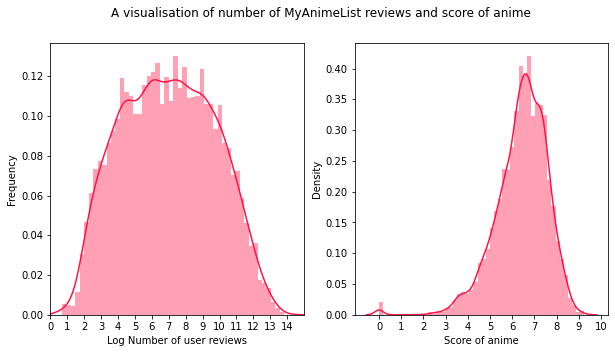

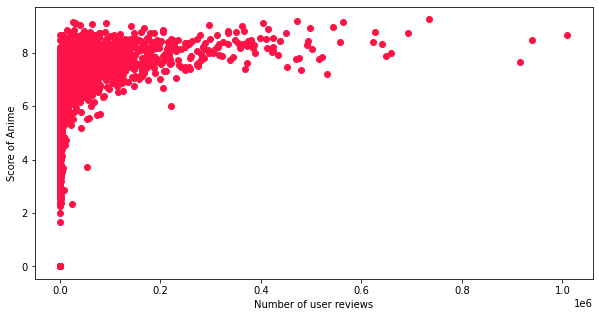

c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


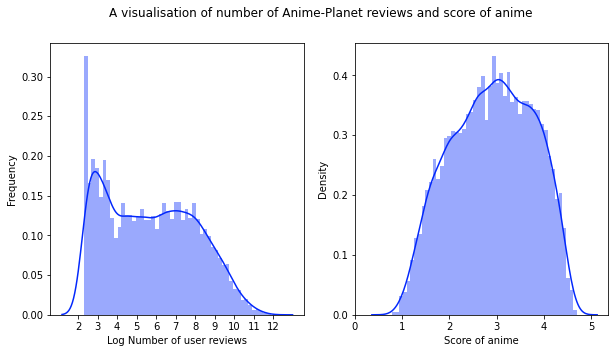

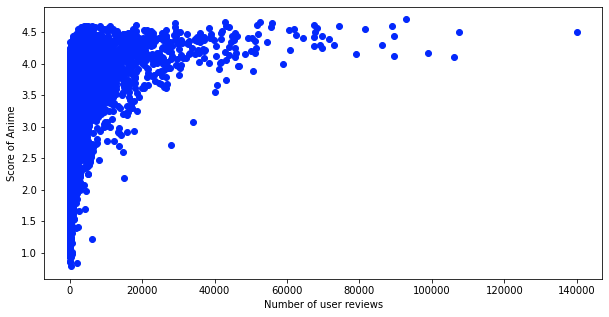

In [26]:
#There is no review, if there are no users who reviewed it.
#log of 0 is undefined, so we must not log these values.
c="#ff1245"
users_reviews_by =np.log(with_votes[with_votes["scored_by"] > 1 ].scored_by)
fig, ax = plt.subplots(1,2)
plt.suptitle("A visualisation of number of MyAnimeList reviews and score of anime")
plt.rcParams["figure.figsize"] = (10,5)
sns.distplot(users_reviews_by,bins=50, color=c, ax=ax[0])
ax[0].set_xlim(0,15)
ax[0].set_xticks(np.arange(np.floor(min(users_reviews_by)),np.ceil(max(users_reviews_by))+1,1))
ax[0].set_xlabel("Log Number of user reviews")
ax[0].set_ylabel("Frequency")

#Distribution of the scores and how many people have scored it.
sns.distplot(with_votes["score"], color=c, ax=ax[1], bins=50)
ax[1].set_xticks(range(0,11))
ax[1].set_xlabel("Score of anime")
plt.show()

plt.scatter(x="scored_by",y="score", data=with_votes, c=c)
plt.xlabel("Number of user reviews")
plt.ylabel("Score of Anime")
plt.show()


#AnimePlanet now.
d= "#0328fc"
users_reviews_by =np.log(with_votes[with_votes["no_of_votes"] > 1 ].no_of_votes)
fig, ax = plt.subplots(1,2)
#First a distribution of no of votes 
plt.suptitle("A visualisation of number of Anime-Planet reviews and score of anime")
plt.rcParams["figure.figsize"] = (10,5)
sns.distplot(users_reviews_by, color=d, ax=ax[0], bins=50)
ax[0].set_xticks(np.arange(np.floor(min(users_reviews_by)),np.ceil(max(users_reviews_by))+1,1))
ax[0].set_xlabel("Log Number of user reviews")
ax[0].set_ylabel("Frequency")

#Distribution of the scores and how many people have scored it.
sns.distplot(with_votes["rating_y"], color=d, ax=ax[1], bins=50)
ax[1].set_xticks(range(0,6))
ax[1].set_xlabel("Score of anime")
plt.show()

plt.scatter(x="no_of_votes",y="rating_y",data=with_votes, c=d)
plt.xlabel("Number of user reviews")
plt.ylabel("Score of Anime")
plt.show()


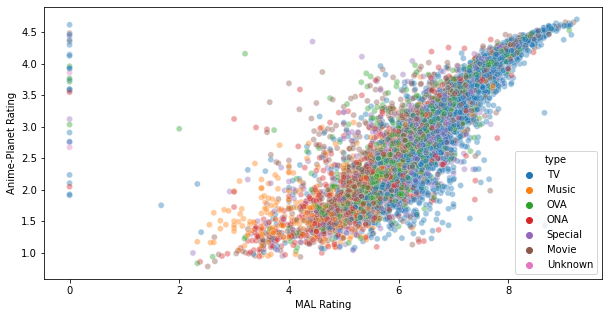

In [27]:
g = sns.scatterplot(data=with_votes,x="score",y="rating_y",hue="type",alpha=0.4)
plt.ylabel("Anime-Planet Rating")
plt.xlabel("MAL Rating")
plt.show()


In [28]:
#Convert times to datetime object so we can use.
with_votes["duration_dt"] = convert_times(with_votes.duration)

In [29]:
#Get number of shows with no episodes
no_ep = with_votes[(with_votes.episodes == 0)]
pd.set_option('display.max_rows',None)
no_ep

,anime_id,title_x,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating_x,score,scored_by,rank_x,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio_x,genre,opening_theme,ending_theme,title_y,anime_type,studio_y,year,season,rating_y,no_of_votes,rank_y,episode_length,duration_dt
59,33398,Neko Konogoro,NaN,ネコこのゴロ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Jun 8, 2016 to ?","{'from': '2016-06-08', 'to': None}",1 min.,None,3.44,18,11426.0,10123,361,0,NaN,Summer 2016,Not scheduled once per week,[],NaN,NaN,Kachidoki Studio,Comedy,[],[],Neko Konogoro,TV,Kachidoki Studio,2016 - ?,NaN,1.256,11,13297.0,21+ eps x 1 min,0 days 00:01:00
281,37320,Amai Choubatsu: Watashi wa Kanshu Senyou Pet,NaN,甘い懲罰~私は看守専用ペット,Amai Choubatsu: Watashi wa Kanshu Sen&#039;you...,https://myanimelist.cdn-dena.com/images/anime/...,TV,Web manga,0,Currently Airing,True,"Apr 2, 2018 to ?","{'from': '2018-04-02', 'to': None}",3 min.,R+ - Mild Nudity,5.26,573,8743.0,4008,8117,28,NaN,Spring 2018,Mondays at 01:00 (JST),"{'Adaptation': [{'mal_id': 112745, 'type': 'ma...","Picante Circus, Suiseisha",NaN,Magic Bus,Ecchi,[],"['""Sweet Punishment"" by rosukey']",Amai Choubatsu - Watashi wa Kanshu Sen'you Pet,Web,Magic Bus,2018,NaN,1.945,896,11155.0,13 eps x 5 min,0 days 00:03:00
324,35249,Uma Musume: Pretty Derby (TV),NaN,ウマ娘 プリティーダービー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Game,0,Currently Airing,True,"Apr 2, 2018 to ?","{'from': '2018-04-02', 'to': None}",23 min.,PG-13 - Teens 13 or older,7.20,5044,2828.0,2049,31678,85,NaN,Spring 2018,Mondays at 00:00 (JST),"{'Adaptation': [{'mal_id': 106804, 'type': 'ma...","Lantis, TOHO animation, Cygames",NaN,P.A. Works,Sports,"['""Make Debut!"" by Special Week (Azumi Waki), ...","['""Glow Up Shine! (グロウアップ・シャイン！)"" by Special W...",Uma Musume: Pretty Derby,TV,P.A. Works,2018,NaN,3.644,1571,3066.0,13 eps,0 days 00:23:00
556,37277,Beatless Intermission,NaN,BEATLESS Intermission,"Beatless Recap, Beatless Episode 5.5, Beatless...",https://myanimelist.cdn-dena.com/images/anime/...,Special,Novel,0,Currently Airing,True,"Feb 17, 2018 to ?","{'from': '2018-02-17', 'to': None}",24 min.,PG-13 - Teens 13 or older,5.46,646,8429.0,5359,3913,7,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 63717, 'type': 'man...",NaN,NaN,Diomedea,"Action, Sci-Fi, Drama, Romance",[],[],Beatless: Intermission,TV Special,diomedea,2018,NaN,1.771,386,11842.0,4 eps,0 days 00:24:00
592,37140,Gegege no Kitarou (2018),GeGeGe no Kitaro,ゲゲゲの鬼太郎 (2018),Spooky Kitaro,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Apr 1, 2018 to ?","{'from': '2018-04-01', 'to': None}",23 min.,G - All Ages,6.89,3033,3950.0,2878,17157,32,NaN,Spring 2018,Sundays at 09:00 (JST),"{'Adaptation': [{'mal_id': 10499, 'type': 'man...","Yomiko Advertising, Fuji TV",NaN,Toei Animation,"Comedy, Demons, Supernatural, Shounen","['""Gegege no Kitarou (ゲゲゲの鬼太郎)"" by Kiyoshi Hik...","['""Kagami no Naka kara (鏡の中から)"" by Maneki Keca...",GeGeGe no Kitarou (2018),TV,Toei Animation,2018 - 2020,NaN,3.540,623,3560.0,97 eps,0 days 00:23:00
625,36474,Sword Art Online: Alicization,NaN,ソードアート・オンライン アリシゼーション,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,0,Not yet aired,False,"Oct, 2018 to ?","{'from': '2018-10-12', 'to': None}",Unknown,PG-13 - Teens 13 or older,0.00,5,NaN,1069,77620,392,NaN,Fall 2018,Unknown,"{'Adaptation': [{'mal_id': 21479, 'type': 'man...",NaN,NaN,A-1 Pictures,"Action, Fantasy, Game, Sci-Fi",[],[],Sword Art Online: Alicization,TV,A-1 Pictures,2018 - 2019,NaN,4.142,14286,983.0,24 eps,0 days 00:00:00
758,36623,SNS Police,NaN,SNSポリス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Web manga,0,Currently Airing,True,"Mar 24, 2018 to May 19, 2018","{'from': '2018-03-24', 'to': '2018-05-19'}",5 min.,G - All Ages,4.40,5,12162.0,11399,187,1,NaN,NaN,NaN,[],NaN,NaN,NaN,Police,[],[],SN

In [34]:
pd.reset_option('display.max_rows')

In [30]:
def get_episode(ep_string):
    """
    Get number of episodes from the scraped anime-planet string.
    Returns integer of number of episodes.
    """
    if "ep" in ep_string:
        if "+" in ep_string:
            return int(ep_string.split("+")[0])
        else:
            return int(ep_string.split("ep")[0])
    else:
        return 0

In [31]:
#Get time in Minutes
dt_min = with_votes["duration_dt"].apply(lambda x: x.total_seconds()/60)
with_votes["dt_min"] = dt_min 

#Correct number of episodes 
with_votes.loc[no_ep.index,"episodes"] = no_ep.episode_length.apply(lambda x: get_episode(x))

In [39]:
with_votes.isnull().sum()

anime_id            0
title_x             0
image_url           8
type                0
source              0
episodes            0
status              0
airing              0
aired               0
duration            0
rating_x            0
score               0
scored_by           0
rank_x             67
popularity          0
members             0
favorites           0
related             0
genre              25
opening_theme       0
ending_theme        0
title_y             0
anime_type          0
year                0
rating_y            0
no_of_votes         0
rank_y              0
episode_length     35
duration_dt         0
dt_min              0
air_year            2
air_season        700
dtype: int64

In [35]:
with_votes

,anime_id,title_x,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating_x,score,scored_by,rank_x,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio_x,genre,opening_theme,ending_theme,title_y,anime_type,studio_y,year,season,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Inu x Boku Secret Service,TV,David Production,2012,NaN,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",My Bride is a Mermaid,TV,"AIC,GONZO",2007,NaN,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Shugo Chara!! Doki,TV,Satelight,2008 - 2009,NaN,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0
3,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Bakuman. 3,TV,J.C. Staff,2012 - 2013,NaN,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0
4,6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,False,"Oct 4, 2009 to Sep 26, 2010","{'from': '2009-10-04', 'to': '2010-09-26'}",24 min. per ep.,G - All Ages,8.03,21618,526.0,1630,45625,826,NaN,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",NaN,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",Yumeiro Pâtissière,TV,Studio Hibari,2009 - 2010,NaN,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,37690,Fure! Fure! Da

In [36]:
#We need to drop the shows with no duration, there is no workaround this and shows with no rank, as it is show-specific.

without_year = with_votes[with_votes["aired"].apply(lambda x: True if eval(x)["from"] == None else False)]
without_year_fixed = without_year["year"].apply(lambda x: None if x =="TBA" else int(x[0:4]))

def get_year(x):
    yr = eval(x)["from"]
    if(yr == None ):
        return None
    else:
        return int(yr[0:4])
    
def get_season(x):
    sn = eval(x)["from"]
    if(sn == None):
        return None
    else:
        mo = int(sn[5:7])
        if(mo in [3,4,5]):
            return "Spring"
        elif(mo in [6,7,8]):
            return "Summer"
        elif(mo in [9,10,11]):
            return "Fall"
        else:
            return "Winter"


#Create a new field for year and season of air.
with_votes["air_year"] = with_votes.aired.apply(lambda x: get_year(x))
with_votes["air_season"] = with_votes.aired.apply(lambda x: get_season(x))

#Get the year from the anime-planet data, sadly the season is unable to be determined.
with_votes.loc[without_year_fixed.index,"air_year"] = without_year_fixed

with_votes.head(5)


,anime_id,title_x,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating_x,score,scored_by,rank_x,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio_x,genre,opening_theme,ending_theme,title_y,anime_type,studio_y,year,season,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min,air_year,air_season
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Inu x Boku Secret Service,TV,David Production,2012,NaN,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0,2012.0,Winter
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",My Bride is a Mermaid,TV,"AIC,GONZO",2007,NaN,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0,2007.0,Spring
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Shugo Chara!! Doki,TV,Satelight,2008 - 2009,NaN,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0,2008.0,Fall
3,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Bakuman. 3,TV,J.C. Staff,2012 - 2013,NaN,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0,2012.0,Fall
4,6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,False,"Oct 4, 2009 to Sep 26, 2010","{'from': '2009-10-04', 'to': '2010-09-26'}",24 min. per ep.,G - All Ages,8.03,21618,526.0,1630,45625,826,NaN,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",NaN,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",Yumeiro Pâtissière,TV,Studio Hibari,2009 - 2010,NaN,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0,2009.0,Fall


In [38]:
#remove unncessary columns.
uncc_cols = ["background","premiered","broadcast","producer","licensor","studio_x","studio_y","title_english","title_synonyms","title_japanese","aired_string","season"]
with_votes.drop(columns=uncc_cols,inplace=True)

In [40]:
#Number of opening songs and ending songs, will give an estimate to how long the series is or how many seasons.
with_votes["no_opening"] = with_votes.opening_theme.apply(lambda x: len(eval(x)))
with_votes["no_ending"] = with_votes.ending_theme.apply(lambda x: len(eval(x)))

#Number of related series, maybe this may have an impact. 
with_votes["no_mal_related"] = with_votes.related.apply(lambda x: len(eval(x)))

with_votes.head()

,anime_id,title_x,image_url,type,source,episodes,status,airing,aired,duration,rating_x,score,scored_by,rank_x,popularity,members,favorites,related,genre,opening_theme,ending_theme,title_y,anime_type,year,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min,air_year,air_season,no_opening,no_ending,no_mal_related
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",Inu x Boku Secret Service,TV,2012,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0,2012.0,Winter,1,7,2
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",My Bride is a Mermaid,TV,2007,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0,2007.0,Spring,1,2,4
2,5262,Shugo Chara!! Doki,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",Shugo Chara!! Doki,TV,2008 - 2009,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0,2008.0,Fall,4,5,3
3,12365,Bakuman. 3rd Season,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",Bakuman. 3,TV,2012 - 2013,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0,2012.0,Fall,2,3,3
4,6586,Yume-iro Pâtissière,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,False,"{'from': '2009-10-04', 'to': '2010-09-26'}",24 min. per ep.,G - All Ages,8.03,21618,526.0,1630,45625,826,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",Yumeiro Pâtissière,TV,2009 - 2010,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0,2009.0,Fall,1,1,3


In [41]:
#Make it categoric
with_votes["content_rating"] =pd.Categorical(with_votes["rating_x"],["None","G - All Ages","PG - Children","PG-13 - Teens 13 or older","R - 17+ (violence & profanity)","R+ - Mild Nudity","Rx - Hentai"],True)
with_votes["status"] = pd.Categorical(with_votes.status,['Not yet aired','Currently Airing', 'Finished Airing'],ordered=True)
with_votes["type"] = pd.Categorical(with_votes.type,["Movie", "TV", "OVA", "Special","ONA", "Music", "Unknown"])
with_votes["source"] = pd.Categorical(with_votes.source, with_votes.source.unique())

In [43]:
uncc_cols = ["image_url","duration","related","opening_theme","ending_theme","rating_x"]
with_votes.drop(columns=uncc_cols,inplace=True)

In [44]:
print(with_votes.isnull().sum())

#Copy 
anime_cln = with_votes.copy()

anime_id            0
title_x             0
type                0
source              0
episodes            0
status              0
airing              0
aired               0
score               0
scored_by           0
rank_x             67
popularity          0
members             0
favorites           0
genre              25
title_y             0
anime_type          0
year                0
rating_y            0
no_of_votes         0
rank_y              0
episode_length     35
duration_dt         0
dt_min              0
air_year            2
air_season        700
no_opening          0
no_ending           0
no_mal_related      0
content_rating      0
dtype: int64


In [45]:
#These are the list of unique genres. 
unique_genres = []
for genre_list in anime_cln.genre.unique():
    if type(genre_list) == str:
        for genre in genre_list.split(","):
            genre = genre.strip()
            if genre not in unique_genres:
                unique_genres.append(genre)
#As you can see, there are far too many to categorise... 
#We can simplify this into a few, 
print(unique_genres)

['Comedy', 'Supernatural', 'Romance', 'Shounen', 'Parody', 'School', 'Magic', 'Shoujo', 'Drama', 'Kids', 'Action', 'Fantasy', 'Music', 'Slice of Life', 'Josei', 'Harem', 'Shounen Ai', 'Adventure', 'Super Power', 'Sci-Fi', 'Ecchi', 'Seinen', 'Martial Arts', 'Game', 'Sports', 'Demons', 'Historical', 'Horror', 'Mystery', 'Samurai', 'Space', 'Mecha', 'Police', 'Vampire', 'Military', 'Psychological', 'Thriller', 'Yaoi', 'Cars', 'Shoujo Ai', 'Hentai', 'Dementia', 'Yuri']


In [46]:
#number of episodes to int
anime_cln.episodes = anime_cln.episodes.astype("int")

anime_cln.drop(anime_cln[((anime_cln.genre.isnull()) | (anime_cln.rank_x.isnull())| (anime_cln.air_year.isnull()) )].index, inplace=True)

In [47]:
anime_cln.isnull().sum()

anime_id            0
title_x             0
type                0
source              0
episodes            0
status              0
airing              0
aired               0
score               0
scored_by           0
rank_x              0
popularity          0
members             0
favorites           0
genre               0
title_y             0
anime_type          0
year                0
rating_y            0
no_of_votes         0
rank_y              0
episode_length     35
duration_dt         0
dt_min              0
air_year            0
air_season        675
no_opening          0
no_ending           0
no_mal_related      0
content_rating      0
dtype: int64

In [48]:
def genre_logic(x):
    """
    Return a True or false array based on whether something is in a genre or not.
    """
    if(type(x) == str):
        is_genre_arr = []
        genre_list =[y.strip() for y in x.split(",")]
        for genre in unique_genres:
            is_genre_arr.append(1 if genre in genre_list else 0)
        return is_genre_arr
    else:
        return np.zeros(len(unique_genres))
        

genre_df = pd.DataFrame(list(anime_cln.genre.apply(lambda x: genre_logic(x))),columns=unique_genres, index=anime_cln.index)

genre_df

,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Kids,Action,Fantasy,Music,Slice of Life,Josei,Harem,Shounen Ai,Adventure,Super Power,Sci-Fi,Ecchi,Seinen,Martial Arts,Game,Sports,Demons,Historical,Horror,Mystery,Samurai,Space,Mecha,Police,Vampire,Military,Psychological,Thriller,Yaoi,Cars,Shoujo Ai,Hentai,Dementia,Yuri
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9060,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9064,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9065,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
anime_cln_gnr = anime_cln.copy().join(genre_df)

anime_cln_gnr.head()

,anime_id,title_x,type,source,episodes,status,airing,aired,score,scored_by,rank_x,popularity,members,favorites,genre,title_y,anime_type,year,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min,air_year,air_season,no_opening,no_ending,no_mal_related,content_rating,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Kids,Action,Fantasy,Music,Slice of Life,Josei,Harem,Shounen Ai,Adventure,Super Power,Sci-Fi,Ecchi,Seinen,Martial Arts,Game,Sports,Demons,Historical,Horror,Mystery,Samurai,Space,Mecha,Police,Vampire,Military,Psychological,Thriller,Yaoi,Cars,Shoujo Ai,Hentai,Dementia,Yuri
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",7.63,139250,1274.0,231,283882,2809,"Comedy, Supernatural, Romance, Shounen",Inu x Boku Secret Service,TV,2012,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0,2012.0,Winter,1,7,2,PG-13 - Teens 13 or older,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",7.89,91206,727.0,366,204003,2579,"Comedy, Parody, Romance, School, Shounen",My Bride is a Mermaid,TV,2007,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0,2007.0,Spring,1,2,4,PG-13 - Teens 13 or older,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",7.55,37129,1508.0,1173,70127,802,"Comedy, Magic, School, Shoujo",Shugo Chara!! Doki,TV,2008 - 2009,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0,2008.0,Fall,4,5,3,PG - Children,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",8.67,107767,50.0,426,182765,2082,"Comedy, Drama, Romance, Shounen",Bakuman. 3,TV,2012 - 2013,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0,2012.0,Fall,2,3,3,PG-13 - Teens 13 or older,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6586,Yume-iro Pâtissière,TV,Manga,50,Finished Airing,False,"{'from': '2009-10-04', 'to': '2010-09-26'}",8.03,21618,526.0,1630,45625,826,"Kids, School, Shoujo",Yumeiro Pâtissière,TV,2009 - 2010,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0,2009.0,Fall,1,1,3,G - All Ages,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [876]:
#Make season categoric
anime_cln_gnr.air_season = pd.Categorical(anime_cln_gnr.air_season,["Spring","Summer","Fall","Winter"])
#Drop unncesary cols- id can be predictor, aired is in datetime string. Type,year,length is scraped but not useful- same with title
anime_cln_gnr.drop(columns=["anime_id","aired","genre","anime_type","year","episode_length","title_y"], inplace=True)

In [68]:
anime90_18 = anime_cln_gnr[(anime_cln_gnr.air_year >= 1990) & (anime_cln_gnr.air_year<=2018)]
anime90_18

,anime_id,title_x,type,source,episodes,status,airing,aired,score,scored_by,rank_x,popularity,members,favorites,genre,title_y,anime_type,year,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min,air_year,air_season,no_opening,no_ending,no_mal_related,content_rating,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Kids,Action,Fantasy,Music,Slice of Life,Josei,Harem,Shounen Ai,Adventure,Super Power,Sci-Fi,Ecchi,Seinen,Martial Arts,Game,Sports,Demons,Historical,Horror,Mystery,Samurai,Space,Mecha,Police,Vampire,Military,Psychological,Thriller,Yaoi,Cars,Shoujo Ai,Hentai,Dementia,Yuri
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",7.63,139250,1274.0,231,283882,2809,"Comedy, Supernatural, Romance, Shounen",Inu x Boku Secret Service,TV,2012,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0,2012.0,Winter,1,7,2,PG-13 - Teens 13 or older,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",7.89,91206,727.0,366,204003,2579,"Comedy, Parody, Romance, School, Shounen",My Bride is a Mermaid,TV,2007,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0,2007.0,Spring,1,2,4,PG-13 - Teens 13 or older,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",7.55,37129,1508.0,1173,70127,802,"Comedy, Magic, School, Shoujo",Shugo Chara!! Doki,TV,2008 - 2009,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0,2008.0,Fall,4,5,3,PG - Children,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",8.67,107767,50.0,426,182765,2082,"Comedy, Drama, Romance, Shounen",Bakuman. 3,TV,2012 - 2013,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0,2012.0,Fall,2,3,3,PG-13 - Teens 13 or older,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6586,Yume-iro Pâtissière,TV,Manga,50,Finished Airing,False,"{'from': '2009-10-04', 'to': '2010-09-26'}",8.03,21618,526.0,1630,45625,826,"Kids, School, Shoujo",Yumeiro Pâtissière,TV,2009 - 2010,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0,2009.0,Fall,1,1,3,G - All Ages,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,37690,Fure! Fure! Daijoubu!,Music,Original,1,Finished Airing,False,"{'from': '2010-10-01', 'to': '2010-10-01'}",4.33,15,10170.0,14384,29,0,"Kids, Music",Fure! Fure! Daijoubu!,Music Video,2010,2.496,14,8734.0,1 ep x 4 min,0 days 00:04:00,4.0,2010.0,Fall,0,0,0,G - All Ages,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9060,37694,Konchuu Ninja,Music,Original,1,Finished Airing,False,"{'from': None, 'to': None}",4.14,7,11002.0,14452,22,0,"Kids, Music",Konchuu Ninja,Music Video,2008,1.719,12,12040.0,1 ep x 2 min,0 days 00:02:00,2.0,2008.0,None,0,0,0,G - All Ages,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9064,37852,AriKiri,ONA,Other,4,Currently Airing,True,"{'from': '2017-08-08', 'to': None}",3.00,4,9697.0,14434,25,0,Slice of Life,AriKiri,Web,2017 - 2018,1.965,12,11069.0,4 eps x 3 min,0 days 00:02:00,2.0,2017.0,Summer,0,0,0,G - All Ages,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9065,37463,Rifujin-jin,Music,Original,1,Finished Airing,False,"{'from': None, 'to': None}",4.38,8,11929.0,14449,23,0,"Kids, Music",Rifujin-jin,Music Video,2016,1.714,12,12058.0,1 ep x 2 min,0 day

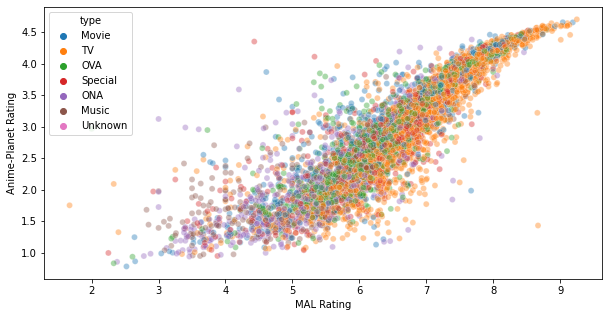

In [70]:
g = sns.scatterplot(data=anime90_18,x="score",y="rating_y",hue="type",alpha=0.4)
plt.ylabel("Anime-Planet Rating")
plt.xlabel("MAL Rating")
plt.show()


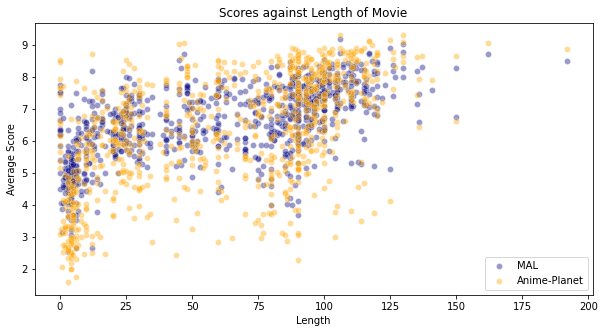

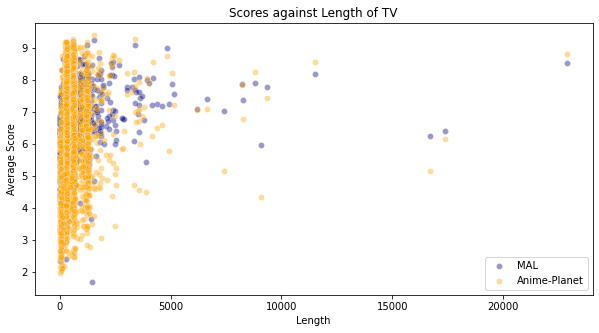

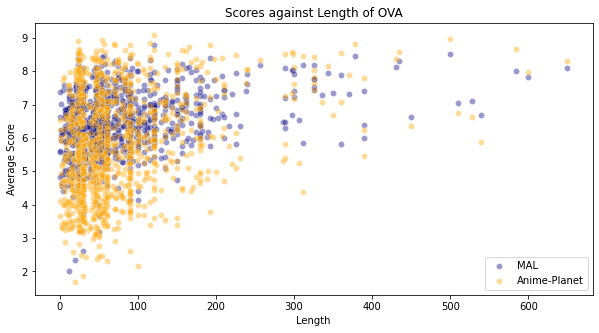

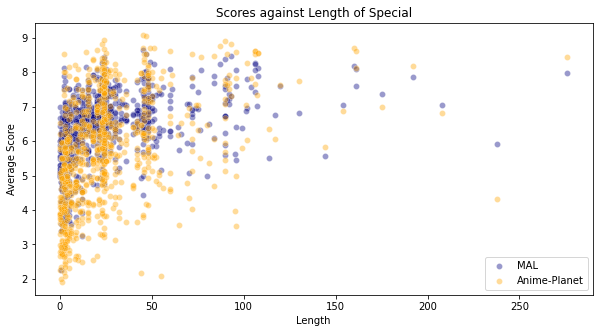

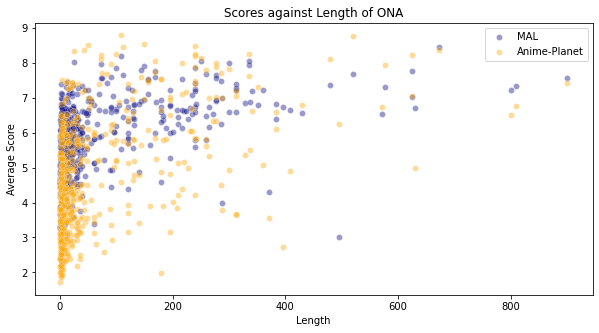

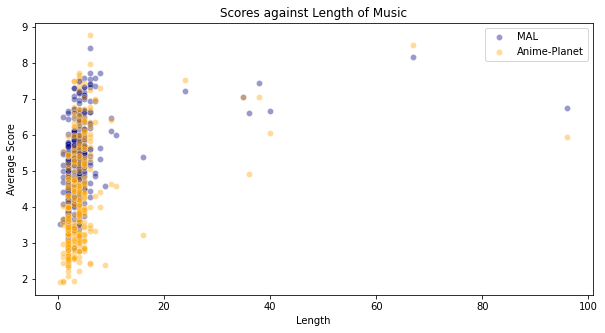

In [71]:
import scipy.stats as stats

#Does duration affect rating?

for tp in anime_cln_gnr.type.cat.categories:
    if(tp == "Unknown"):
        break
    type_only = anime90_18[anime90_18["type"]== tp]
    sns.scatterplot(y=type_only.score ,x=(type_only.episodes*type_only.dt_min), alpha=0.4,color="navy")
    plt.xlabel("Length")
    plt.ylabel("Average Score")

    sns.scatterplot(y=type_only.rating_y*2,x=(type_only.episodes*type_only.dt_min),alpha=0.4,color="orange")
    plt.xlabel("Length")
    plt.ylabel("Average Score")
    plt.legend(["MAL","Anime-Planet"])
    plt.title("Scores against Length of "+ tp)
    plt.show()

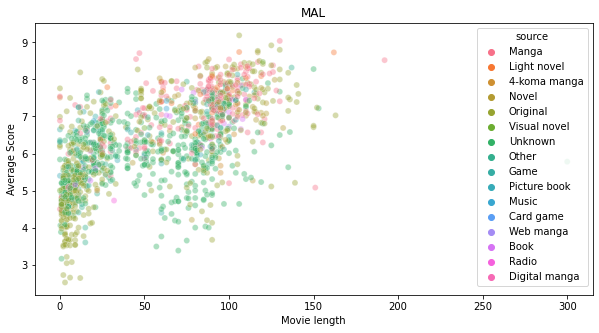

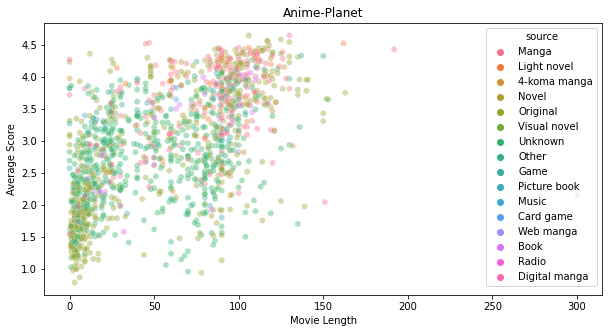

In [52]:
type_only = anime_cln_gnr[anime_cln_gnr["type"]== "Movie"]
sns.scatterplot(y=type_only.score ,x=(type_only.episodes*type_only.dt_min), alpha=0.4,color="navy",hue=type_only.source)
plt.xlabel("Movie length")
plt.ylabel("Average Score")
plt.title("MAL")
plt.show()
sns.scatterplot(y=type_only.rating_y,x=(type_only.episodes*type_only.dt_min),alpha=0.4,hue=type_only.source)
plt.xlabel("Movie Length")
plt.ylabel("Average Score")
plt.title("Anime-Planet")
plt.show()

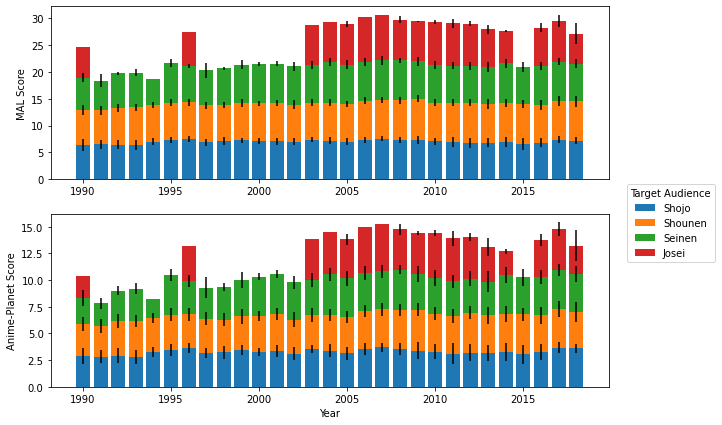

In [223]:
#Manga by target audience, Shoujo is young female teen, shounen is young male teen, Seinen young adult men, Josei young adult female.  
shojo = anime_cln_gnr[((anime_cln_gnr.Shoujo == 1))]
shounen = anime_cln_gnr[((anime_cln_gnr.Shounen == 1))]
seinen = anime_cln_gnr[((anime_cln_gnr.Seinen == 1))]
josei = anime_cln_gnr[((anime_cln_gnr.Josei == 1))]
target_aud = [shojo, shounen, seinen, josei]

fig, ax = plt.subplots(2,1,figsize=(10,7))
#MAL
bot = 0
mn = target_aud[0].groupby(["air_year"]).mean()[1990:]
sd = target_aud[0].groupby(["air_year"]).std()[1990:]
ax[0].bar(mn.index,mn.score,yerr=sd.score)
bot = mn.score

mn = target_aud[1].groupby(["air_year"]).mean()[1990:]
sd = target_aud[1].groupby(["air_year"]).std()[1990:]
ax[0].bar(mn.index,mn.score,yerr=sd.score, bottom=bot)

bot += mn.score

mn = target_aud[2].groupby(["air_year"]).mean()[1990:]
sd = target_aud[2].groupby(["air_year"]).std()[1990:]
ax[0].bar(mn.index,mn.score,yerr=sd.score, bottom=bot)

bot[mn.index] += mn.score

mn = target_aud[3].groupby(["air_year"]).mean()[1990:]
sd = target_aud[3].groupby(["air_year"]).std()[1990:]
ax[0].bar(mn.index,mn.score,yerr=sd.score, bottom=bot[mn.index])
ax[0].set_ylabel("MAL Score")

#Anime-Planet
bot = 0
mn = target_aud[0].groupby(["air_year"]).mean()[1990:]
sd = target_aud[0].groupby(["air_year"]).std()[1990:]
ax[1].bar(mn.index,mn.rating_y,yerr=sd.rating_y)
bot = mn.rating_y

mn = target_aud[1].groupby(["air_year"]).mean()[1990:]
sd = target_aud[1].groupby(["air_year"]).std()[1990:]
ax[1].bar(mn.index,mn.rating_y,yerr=sd.rating_y, bottom=bot)

bot += mn.rating_y

mn = target_aud[2].groupby(["air_year"]).mean()[1990:]
sd = target_aud[2].groupby(["air_year"]).std()[1990:]
ax[1].bar(mn.index,mn.rating_y,yerr=sd.rating_y, bottom=bot)

bot[mn.index] += mn.rating_y

mn = target_aud[3].groupby(["air_year"]).mean()[1990:]
sd = target_aud[3].groupby(["air_year"]).std()[1990:]
ax[1].bar(mn.index,mn.rating_y,yerr=sd.rating_y, bottom=bot[mn.index])

ax[1].set_xlabel("Year")
ax[1].set_ylabel("Anime-Planet Score")

plt.legend(["Shojo","Shounen","Seinen","Josei"],title="Target Audience",loc="upper right",bbox_to_anchor=(1.2, 1.2))
plt.show()





In [262]:
def print_mean_score(x,y):
    """
    Print the mean scores.
    """
    db =  "MAL" if y=="mal" else "AP" 
    print("How",db,"Scores has changed from 90s, 2000s and 2010s")
    print(np.mean(x[1990:2000]))
    print(np.mean(x[2000:2005]))
    print(np.mean(x[2000:2010]))
    print(np.mean(x[2010:]))
    print("\n")
    
def print_std_score(x,y):
    db =  "MAL" if y=="mal" else "AP" 
    print("How",db,"std has changed from 90s, 2000s and 2010s")
    print(np.std(x[1990:2000]))
    print(np.std(x[2000:2005]))
    print(np.std(x[2000:2010]))
    print(np.std(x[2010:]))
    print("\n")

#Changing the n will change the type of show. n=0,1,2,3 => Shojo, Shounen,Seinen and Josei
n = 1
score = target_aud[n].groupby(["air_year"]).mean()[1990:]["score"]
print_mean_score(score,"mal")
print_std_score(score,"mal")


score = target_aud[n].groupby(["air_year"]).mean()[1990:]["rating_y"]
print_mean_score(score,"ap")
print_std_score(score,"ap")


How MAL Scores has changed from 90s, 2000s and 2010s
6.820775728772764
7.033249429738117
7.1896917272989045
7.291476203831972


How MAL std has changed from 90s, 2000s and 2010s
0.20520916931404024
0.06975586072240218
0.20477334038401235
0.10389574808295046


How AP Scores has changed from 90s, 2000s and 2010s
3.172256280668534
3.3099314524596273
3.460745615314984
3.578657742370141


How AP std has changed from 90s, 2000s and 2010s
0.12442714189915642
0.10290584502164873
0.19513363376766144
0.10330761797610358




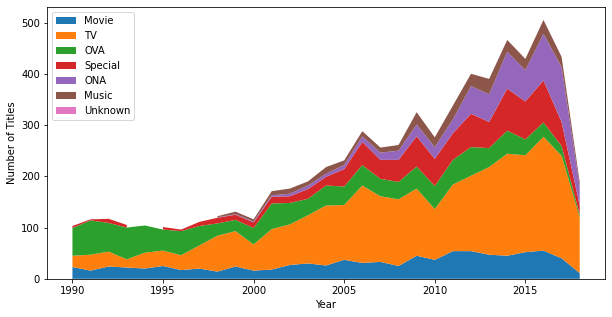

In [72]:
#Last 28 years
last_28 = anime_cln_gnr.groupby(["air_year","type"])
last_18 = last_28.count()[455:]

lbl = last_18.index.get_level_values("air_year").unique()
cat =last_18.index.get_level_values("type").unique()

y = np.transpose(np.array(last_18["title_x"]).reshape(29,7))

plt.stackplot(lbl,y,labels=cat)
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

In [102]:
last_18.loc[[1990,2005,2010,2014,2015],]

anime_id  title_x  source  episodes  status  airing  aired  \
air_year type                                                                  
1990.0   Movie        23.0     23.0    23.0      23.0    23.0    23.0   23.0   
         TV           22.0     22.0    22.0      22.0    22.0    22.0   22.0   
         OVA          54.0     54.0    54.0      54.0    54.0    54.0   54.0   
         Special       4.0      4.0     4.0       4.0     4.0     4.0    4.0   
         ONA           NaN      NaN     NaN       NaN     NaN     NaN    NaN   
         Music         5.0      5.0     5.0       5.0     5.0     5.0    5.0   
         Unknown       NaN      NaN     NaN       NaN     NaN     NaN    NaN   
2005.0   Movie        37.0     37.0    37.0      37.0    37.0    37.0   37.0   
         TV          107.0    107.0   107.0     107.0   107.0   107.0  107.0   
         OVA          36.0     36.0    36.0      36.0    36.0    36.0   36.0   
         Special      34.0     34.0    34.0      34.0    34.0    34.0   34.0   
         ONA           8.0      8.0     8.0       8.0     8.0     8.0    8.0   
         Music         9.0      9.0     9.0       9.0     9.0     9.0    9.0   
         Unknown       NaN      NaN     NaN       NaN     NaN     NaN    NaN   
2010.0   Movie        37.0     37.0    37.0      37.0    37.0    37.0   37.0   
         TV           99.0     99.0    99.0      99.0    99.0    99.0   99.0   
         OVA          45.0     45.0    45.0      45.0    45.0    45.0   45.0   
         Special      53.0     53.0    53.0      53.0    53.0    53.0   53.0   
         ONA          23.0     23.0    23.0      23.0    23.0    23.0   23.0   
         Music        19.0     19.0    19.0      19.0    19.0    19.0   19.0   
         Unknown       NaN      NaN     NaN       NaN     NaN     NaN    NaN   
2014.0   Movie        45.0     45.0    45.0      45.0    45.0    45.0   45.0   
         TV          199.0    199.0   199.0     199.0   199.0   199.0  199.0   
         OVA          45.0     45.0    45.0      45.0    45.0    45.0   45.0   
         Special      82.0     82.0    82.0      82.0    82.0    82.0   82.0   
         ONA          72.0     72.0    72.0      72.0    72.0    72.0   72.0   
         Music        23.0     23.0    23.0      23.0    23.0    23.0   23.0   
         Unknown       NaN      NaN     NaN       NaN     NaN     NaN    NaN   
2015.0   Movie        52.0     52.0    52.0      52.0    52.0    52.0   52.0   
         TV          189.0    189.0   189.0     189.0   189.0   189.0  189.0   
         OVA          31.0     31.0    31.0      31.0    31.0    31.0   31.0   
         Special      74.0     74.0    74.0      74.0    74.0    74.0   74.0   
         ONA          61.0     61.0    61.0      61.0    61.0    61.0   61.0   
         Music        22.0     22.0    22.0      22.0    22.0    22.0   22.0   
         Unknown       NaN      NaN     NaN       NaN     NaN     NaN    NaN   

                  score  scored_by  rank_x  popularity  members  favorites  \
air_year type                                                                
1990.0   Movie     23.0       23.0    23.0        23.0     23.0       23.0   
         TV        22.0       22.0    22.0        22.0     22.0       22.0   
         OVA       54.0       54.0    54.0        54.0     54.0       54.0   
         Special    4.0        4.0     4.0         4.0      4.0        4.0   
         ONA        NaN        NaN     NaN         NaN      NaN        NaN   
         Music      5.0        5.0     5.0         5.0      5.0        5.0   
         Unknown    NaN        NaN     NaN         NaN      NaN        NaN   
2005.0   Movie     37.0       37.0    37.0        37.0     37.0       37.0   
         TV       107.0      107.0   107.0       107.0    107.0      107.0   
         OVA       36.0       36.0    36.0        36.0     36.0       36.0   
         Special   34.0       34.0    34.0        34.0     34.0       34.0   
         ONA        8.0        8.0     8.0 

c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


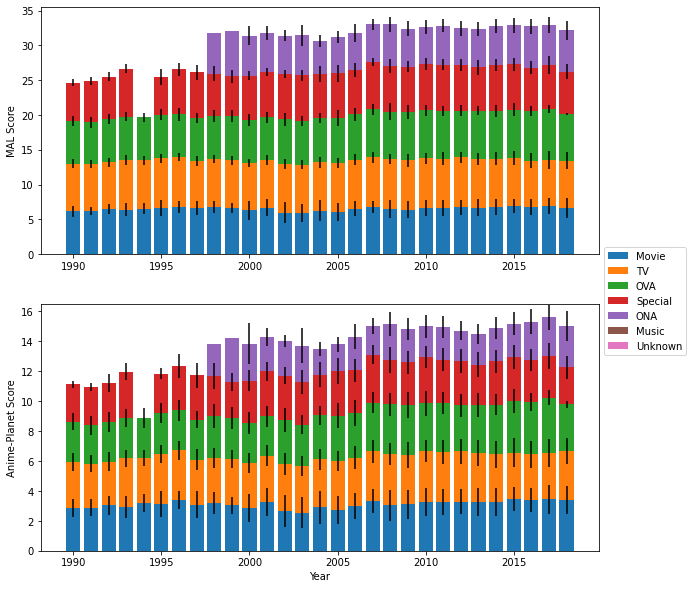

In [199]:
#now lets look at 
plt.figure(figsize=(10,10))
mean_28 = last_28.mean()[455:]
std_28 = last_28.std()[455:]
y = np.transpose(np.array(mean_28["score"]).reshape(29,7))
sd = np.transpose(np.array(std_28["score"]).reshape(29,7))
width = 0.35
count=1
bottom = 0
for y_type,y_std in zip(y,sd):
        plt.subplot(2,1,1)
        if(type(bottom) == int):
            plt.bar(lbl, y_type, label=cat[count-1],yerr=y_std)
            bottom = y_type
        else:
            plt.bar(lbl, y_type, label=cat[count-1],bottom=bottom, yerr=y_std)
            bottom += y_type        
        count+=1
plt.ylabel("MAL Score")

#now lets look at Anime-Planet
mean_28 = last_28.mean()[455:]
std_28 = last_28.std()[455:]
y = np.transpose(np.array(mean_28["rating_y"]).reshape(29,7))
sd = np.transpose(np.array(std_28["rating_y"]).reshape(29,7))
width = 0.35
count=1
bottom = 0
for y_type,y_std in zip(y,sd):
        plt.subplot(2,1,2)
        if(type(bottom) == int):
            plt.bar(lbl, y_type, label=cat[count-1],yerr=y_std)
            bottom = y_type
        else:
            plt.bar(lbl, y_type, label=cat[count-1],bottom=bottom, yerr=y_std)
            bottom += y_type        
        count+=1
plt.legend(bbox_to_anchor=(1, 1.25))
plt.xlabel("Year")
plt.ylabel("Anime-Planet Score")
plt.show()


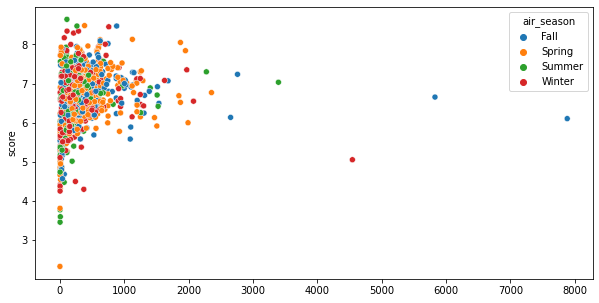

In [263]:
#We want to create a graph where we want to see the seasonal changes of scores.
by_yr_sn = anime90_18.groupby(["air_year","air_season","source"])
sel = by_yr_sn.mean()
hue = sel.index.get_level_values("air_season")

sns.scatterplot(x=sel.dt_min*sel.episodes,y=sel.score,hue = hue)
plt.show()

In [147]:
#Standardise score for analysis.
mal = stats.zscore(anime90_18.score)
ap = stats.zscore(anime90_18.rating_y)

#Standrised scores.
zanime = anime90_18.copy()
zanime["mal_score"] = mal
zanime["ap_score"] = ap
zanime.head()

,anime_id,title_x,type,source,episodes,status,airing,aired,score,scored_by,rank_x,popularity,members,favorites,genre,title_y,anime_type,year,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min,air_year,air_season,no_opening,no_ending,no_mal_related,content_rating,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Kids,Action,Fantasy,Music,Slice of Life,Josei,Harem,Shounen Ai,Adventure,Super Power,Sci-Fi,Ecchi,Seinen,Martial Arts,Game,Sports,Demons,Historical,Horror,Mystery,Samurai,Space,Mecha,Police,Vampire,Military,Psychological,Thriller,Yaoi,Cars,Shoujo Ai,Hentai,Dementia,Yuri,mal_score,ap_score
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",7.63,139250,1274.0,231,283882,2809,"Comedy, Supernatural, Romance, Shounen",Inu x Boku Secret Service,TV,2012,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0,2012.0,Winter,1,7,2,PG-13 - Teens 13 or older,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.010156,1.208777
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",7.89,91206,727.0,366,204003,2579,"Comedy, Parody, Romance, School, Shounen",My Bride is a Mermaid,TV,2007,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0,2007.0,Spring,1,2,4,PG-13 - Teens 13 or older,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.251243,1.214565
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",7.55,37129,1508.0,1173,70127,802,"Comedy, Magic, School, Shoujo",Shugo Chara!! Doki,TV,2008 - 2009,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0,2008.0,Fall,4,5,3,PG - Children,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.935975,1.132374
3,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",8.67,107767,50.0,426,182765,2082,"Comedy, Drama, Romance, Shounen",Bakuman. 3,TV,2012 - 2013,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0,2012.0,Fall,2,3,3,PG-13 - Teens 13 or older,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.974505,1.778323
4,6586,Yume-iro Pâtissière,TV,Manga,50,Finished Airing,False,"{'from': '2009-10-04', 'to': '2010-09-26'}",8.03,21618,526.0,1630,45625,826,"Kids, School, Shoujo",Yumeiro Pâtissière,TV,2009 - 2010,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0,2009.0,Fall,1,1,3,G - All Ages,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.381059,1.347690


In [264]:
zanime

,anime_id,title_x,type,source,episodes,status,airing,aired,score,scored_by,rank_x,popularity,members,favorites,genre,title_y,anime_type,year,rating_y,no_of_votes,rank_y,episode_length,duration_dt,dt_min,air_year,air_season,no_opening,no_ending,no_mal_related,content_rating,Comedy,Supernatural,Romance,Shounen,Parody,School,Magic,Shoujo,Drama,Kids,Action,Fantasy,Music,Slice of Life,Josei,Harem,Shounen Ai,Adventure,Super Power,Sci-Fi,Ecchi,Seinen,Martial Arts,Game,Sports,Demons,Historical,Horror,Mystery,Samurai,Space,Mecha,Police,Vampire,Military,Psychological,Thriller,Yaoi,Cars,Shoujo Ai,Hentai,Dementia,Yuri,mal_score,ap_score
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",7.63,139250,1274.0,231,283882,2809,"Comedy, Supernatural, Romance, Shounen",Inu x Boku Secret Service,TV,2012,4.019,19936,1424.0,12 eps,0 days 00:24:00,24.0,2012.0,Winter,1,7,2,PG-13 - Teens 13 or older,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.010156,1.208777
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",7.89,91206,727.0,366,204003,2579,"Comedy, Parody, Romance, School, Shounen",My Bride is a Mermaid,TV,2007,4.024,16088,1404.0,26 eps,0 days 00:24:00,24.0,2007.0,Spring,1,2,4,PG-13 - Teens 13 or older,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.251243,1.214565
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",7.55,37129,1508.0,1173,70127,802,"Comedy, Magic, School, Shoujo",Shugo Chara!! Doki,TV,2008 - 2009,3.953,7310,1681.0,51 eps,0 days 00:24:00,24.0,2008.0,Fall,4,5,3,PG - Children,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.935975,1.132374
3,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",8.67,107767,50.0,426,182765,2082,"Comedy, Drama, Romance, Shounen",Bakuman. 3,TV,2012 - 2013,4.511,10453,93.0,25 eps,0 days 00:24:00,24.0,2012.0,Fall,2,3,3,PG-13 - Teens 13 or older,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.974505,1.778323
4,6586,Yume-iro Pâtissière,TV,Manga,50,Finished Airing,False,"{'from': '2009-10-04', 'to': '2010-09-26'}",8.03,21618,526.0,1630,45625,826,"Kids, School, Shoujo",Yumeiro Pâtissière,TV,2009 - 2010,4.139,4827,998.0,50 eps,0 days 00:24:00,24.0,2009.0,Fall,1,1,3,G - All Ages,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.381059,1.347690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,37690,Fure! Fure! Daijoubu!,Music,Original,1,Finished Airing,False,"{'from': '2010-10-01', 'to': '2010-10-01'}",4.33,15,10170.0,14384,29,0,"Kids, Music",Fure! Fure! Daijoubu!,Music Video,2010,2.496,14,8734.0,1 ep x 4 min,0 days 00:04:00,4.0,2010.0,Fall,0,0,0,G - All Ages,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.049800,-0.554270
9060,37694,Konchuu Ninja,Music,Original,1,Finished Airing,False,"{'from': None, 'to': None}",4.14,7,11002.0,14452,22,0,"Kids, Music",Konchuu Ninja,Music Video,2008,1.719,12,12040.0,1 ep x 2 min,0 days 00:02:00,2.0,2008.0,None,0,0,0,G - All Ages,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.225979,-1.453737
9064,37852,AriKiri,ONA,Other,4,Currently Airing,True,"{'from': '2017-08-08', 'to': None}",3.00,4,9697.0,14434,25,0,Slice of Life,AriKiri,Web,2017 - 2018,1.965,12,11069.0,4 eps x 3 min,0 days 00:02:00,2.0,2017.0,Summer,0,0,0,G - All Ages,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.283054,-1.168964
9065,37463,Rifujin

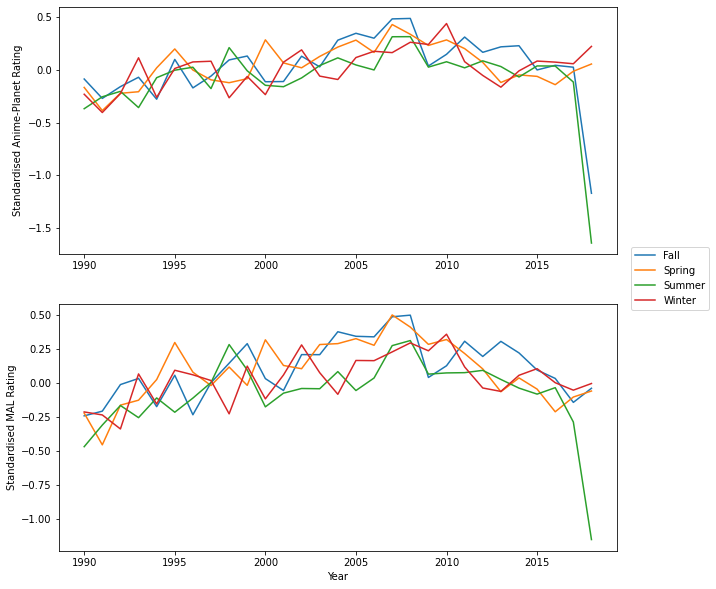

In [211]:
#Let us see how seasonal variations change score.
by_yr_sn = zanime.groupby(["air_year","air_season"])
sel = by_yr_sn.mean()
hue = sel.index.get_level_values("air_season")
yr = sel.index.get_level_values("air_year")

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(x=yr, y= sel.ap_score ,hue=hue,legend=None )
plt.xlabel("")
plt.ylabel("Standardised Anime-Planet Rating")


plt.subplot(2,1,2)
sns.lineplot(x=yr, y= sel.mal_score ,hue=hue, )
plt.xlabel("Year")
plt.ylabel("Standardised MAL Rating")
plt.legend(bbox_to_anchor=(1.175, 1.25))
plt.show()

In [ ]:
sns.

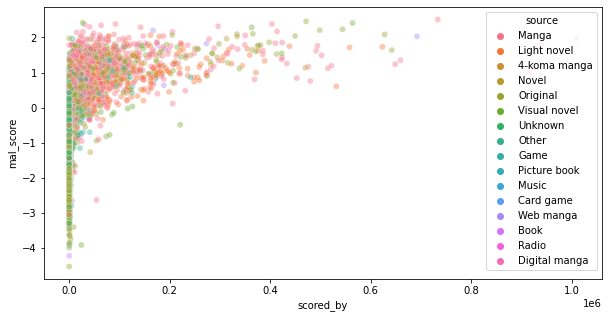

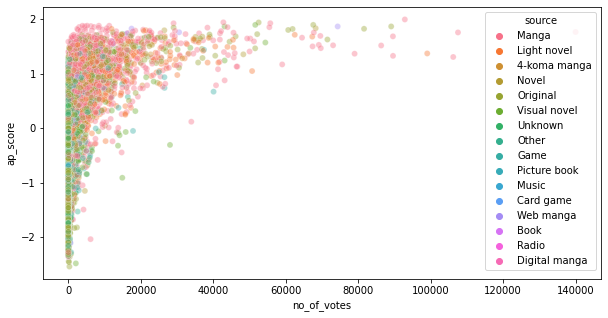

In [215]:
sns.scatterplot(data=zanime,x="scored_by",y="mal_score",hue="source",alpha=0.4)
plt.show()
sns.scatterplot(data=zanime,x="no_of_votes",y="ap_score",hue="source",alpha=0.4)
plt.show()

In [100]:
sel.loc[[1990,1995,2000,2005,2010,2015,2018]]

anime_id   episodes  airing     score  \
air_year air_season source                                                     
1990.0   Fall       Manga           5180.142857  30.285714     0.0  6.631429   
                    Light novel             NaN        NaN     NaN       NaN   
                    4-koma manga            NaN        NaN     NaN       NaN   
                    Novel                   NaN        NaN     NaN       NaN   
                    Original        2292.000000   6.000000     0.0  5.960000   
...                                         ...        ...     ...       ...   
2018.0   Winter     Card game      34863.000000  12.000000     0.0  7.380000   
                    Web manga      36668.800000  13.200000     0.0  6.708000   
                    Book                    NaN        NaN     NaN       NaN   
                    Radio                   NaN        NaN     NaN       NaN   
                    Digital manga           NaN        NaN     NaN       NaN   

                                     scored_by       rank_x   popularity  \
air_year air_season source                                                 
1990.0   Fall       Manga           195.428571  5434.857143  9154.428571   
                    Light novel            NaN          NaN          NaN   
                    4-koma manga           NaN          NaN          NaN   
                    Novel                  NaN          NaN          NaN   
                    Original        649.000000  7431.000000  7335.000000   
...                                        ...          ...          ...   
2018.0   Winter     Card game      2663.000000  2140.000000  3170.000000   
                    Web manga      3354.400000  5010.200000  4856.000000   
                    Book                   NaN          NaN          NaN   
                    Radio                  NaN          NaN          NaN   
                    Digital manga          NaN          NaN          NaN   

                                        members  favorites  rating_y  \
air_year air_season source                                             
1990.0   Fall       Manga            664.142857   3.571429  3.198429   
                    Light novel             NaN        NaN       NaN   
                    4-koma manga            NaN        NaN       NaN   
                    Novel                   NaN        NaN       NaN   
                    Original        1592.000000  10.000000  2.458000   
...                                         ...        ...       ...   
2018.0   Winter     Card game      14213.000000  76.000000  3.773000   
                    Web manga      13638.200000  58.000000  3.538000   
                    Book                    NaN        NaN       NaN   
                    Radio                   NaN        NaN       NaN   
                    Digital manga           NaN        NaN       NaN   

                                   no_of_votes       rank_y     dt_min  \
air_year air_season source                                               
1990.0   Fall       Manga            41.714286  5297.428571  28.857143   
                    Light novel            NaN          NaN        NaN   
                    4-koma manga           NaN          NaN        NaN   
                    Novel                  NaN          NaN        NaN   
                    Original        265.000000  8918.000000  30.000000   
...                                        ...          ...        ...   
2018.0   Winter     Card game       535.000000  2480.000000  24.000000   
                    Web manga      1417.600000  3688.600000  15.516667   
                    Book                   NaN          NaN        NaN   
                    Radio                  NaN          NaN        NaN   
                    Digital manga          NaN          NaN        NaN   

                                   no_opening  no_ending  no_mal_related  \
air_year air_season source       

In [119]:
#Let us try and predict the values
anime90_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6793 entries, 0 to 9071
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   anime_id        6793 non-null   int64          
 1   title_x         6793 non-null   object         
 2   type            6793 non-null   category       
 3   source          6793 non-null   category       
 4   episodes        6793 non-null   int32          
 5   status          6793 non-null   category       
 6   airing          6793 non-null   bool           
 7   aired           6793 non-null   object         
 8   score           6793 non-null   float64        
 9   scored_by       6793 non-null   int64          
 10  rank_x          6793 non-null   float64        
 11  popularity      6793 non-null   int64          
 12  members         6793 non-null   int64          
 13  favorites       6793 non-null   int64          
 14  genre           6793 non-null   object  

In [120]:
#Looking at correlations
print(abs(anime90_18.iloc[:,:].corr()["score"]).sort_values(0,False))
conf_var = abs(anime90_18.iloc[:,:].corr()["score"]).sort_values(0,False)[0:11].index
all_var = abs(anime90_18.iloc[:,:].corr()["score"]).sort_values(0,False).index

score             1.000000
rating_y          0.893766
rank_x            0.888706
rank_y            0.884780
popularity        0.746249
no_mal_related    0.505903
members           0.431730
no_of_votes       0.415502
scored_by         0.392373
no_opening        0.374493
no_ending         0.340813
dt_min            0.337880
anime_id          0.321506
favorites         0.251051
Drama             0.241088
Shounen           0.233508
Music             0.226359
Kids              0.220600
Romance           0.207226
Dementia          0.195011
Action            0.194852
School            0.181222
Supernatural      0.162876
Mystery           0.149623
Adventure         0.126429
Seinen            0.123918
Comedy            0.119656
Sci-Fi            0.097008
Shoujo            0.096510
Military          0.095672
Slice of Life     0.091693
episodes          0.091613
Fantasy           0.090132
Psychological     0.089812
Magic             0.085979
Super Power       0.084226
Sports            0.080307
H

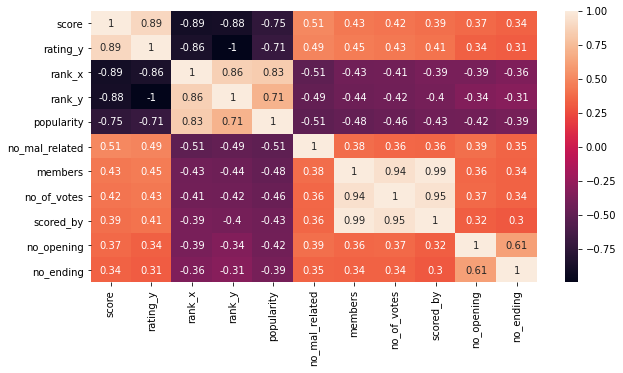

In [121]:
#get corr df to put into heatmap
corr_df = anime90_18.loc[:,conf_var].corr()

sns.heatmap(corr_df,annot=True)
plt.show()

In [1167]:
#Checking all the variables
print(all_var)
#Checking the y-variable
y_var = all_var[0]


Index(['score', 'rating_y', 'rank_y', 'rank_x', 'popularity', 'no_mal_related',
       'members', 'no_of_votes', 'no_opening', 'scored_by', 'no_ending',
       'dt_min', 'Music', 'Drama', 'favorites', 'Shounen', 'Kids', 'Dementia',
       'Romance', 'air_year', 'Action', 'School', 'Supernatural', 'Mystery',
       'Comedy', 'Adventure', 'Seinen', 'Sci-Fi', 'Slice of Life', 'Military',
       'Shoujo', 'Fantasy', 'Magic', 'episodes', 'Super Power',
       'Psychological', 'Harem', 'Sports', 'Police', 'Thriller', 'Mecha',
       'Historical', 'Josei', 'Space', 'Demons', 'Vampire', 'Ecchi',
       'Martial Arts', 'Shounen Ai', 'Shoujo Ai', 'Samurai', 'Game', 'Cars',
       'Parody', 'Horror', 'airing'],
      dtype='object')


In [1175]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
#Let us predict rating_y also known as the anime planet score using the other variables.
cv= KFold(n_splits=10,shuffle=True)

X = anime_cln_gnr.loc[:,all_var[1:]]
y = anime_cln_gnr.loc[:,all_var[0]]

#lin reg
mdl = LinearRegression()

scores = cross_val_score(mdl,X,y,scoring="neg_mean_squared_error",cv=cv)

r2 =cross_val_score(mdl,X,y,scoring="r2",cv=cv)


In [1176]:
print("The root mean squared error when using k-fold crossvalidation is", np.sqrt(-scores.mean()))

print("r2 is " + str(r2.mean()))


The root mean squared error when using k-fold crossvalidation is 0.4004923755537742
r2 is 0.8654731717503278


In [1183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.25)

mdl.fit(X_train,y_train)

predicted = mdl.predict(X_test)
#The predicted scores
print(predicted)
print(y_test)

[6.54586871 5.77597526 4.95706545 ... 4.55542762 5.14990329 6.22466414]
7120    6.17
5845    5.89
5888    3.90
2589    5.71
5331    7.60
        ... 
4998    5.61
528     5.59
6029    4.04
443     3.77
8084    7.25
Name: score, Length: 6150, dtype: float64


In [1184]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("The root mean squared error from train test split is", np.sqrt(mean_squared_error(y_test,predicted)))
print("The r2 score for this is",r2_score(y_test,predicted))

The root mean squared error from train test split is 0.4055836895528309
The r2 score for this is 0.8633939144973483
